In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#%matplotlib 

## Transformada de Fourier en 2D
Podemos interpretar los cambios de intensidad de la imagen como funciones sobre un plano

![SNOWFALL](fourier.png)

In [2]:
# Leemos ambas imagenes
img_low_freq = cv.imread('fft_hf.jpg', cv.IMREAD_GRAYSCALE)
img_hig_freq = cv.imread('fft_lf.jpg', cv.IMREAD_GRAYSCALE)
# Aplico la transformada
img_fft_low = np.fft.fft2(img_low_freq)
img_fft_hig = np.fft.fft2(img_hig_freq)
# llevo la baja frec al origen para acomodar la visualizacion
img_fft_low = np.fft.fftshift(img_fft_low)
img_fft_hig = np.fft.fftshift(img_fft_hig)
# obtengo el modulo
img_fft_low = 20*np.log(np.abs(img_fft_low))
img_fft_hig = 20*np.log(np.abs(img_fft_hig))
# Tomamos un "perfil" de una fila por cada imagen
low_freq_sg = img_low_freq[50,10:60]
hig_freq_sg = img_hig_freq[50,10:60]

**Input:** Image I of size M×N.

**Output:** Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure

**Step 1:** Compute F which is the Fourier Transform representation of image I

**Step 2:** Find Fc which is obtained by shifting the origin of F to centre.

**Step 3:** Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I.

**Step 4:** Calculate M = max (AF) where M is the maximum value of the frequency component in F.

**Step 5:** Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000.

**Step 6:** Calculate Image Quality measure (FM) from equation (1).

$$
\text{Image Quality Measure (FM)} = \frac{T_H}{M \times N}
$$


Graficamos los resultados

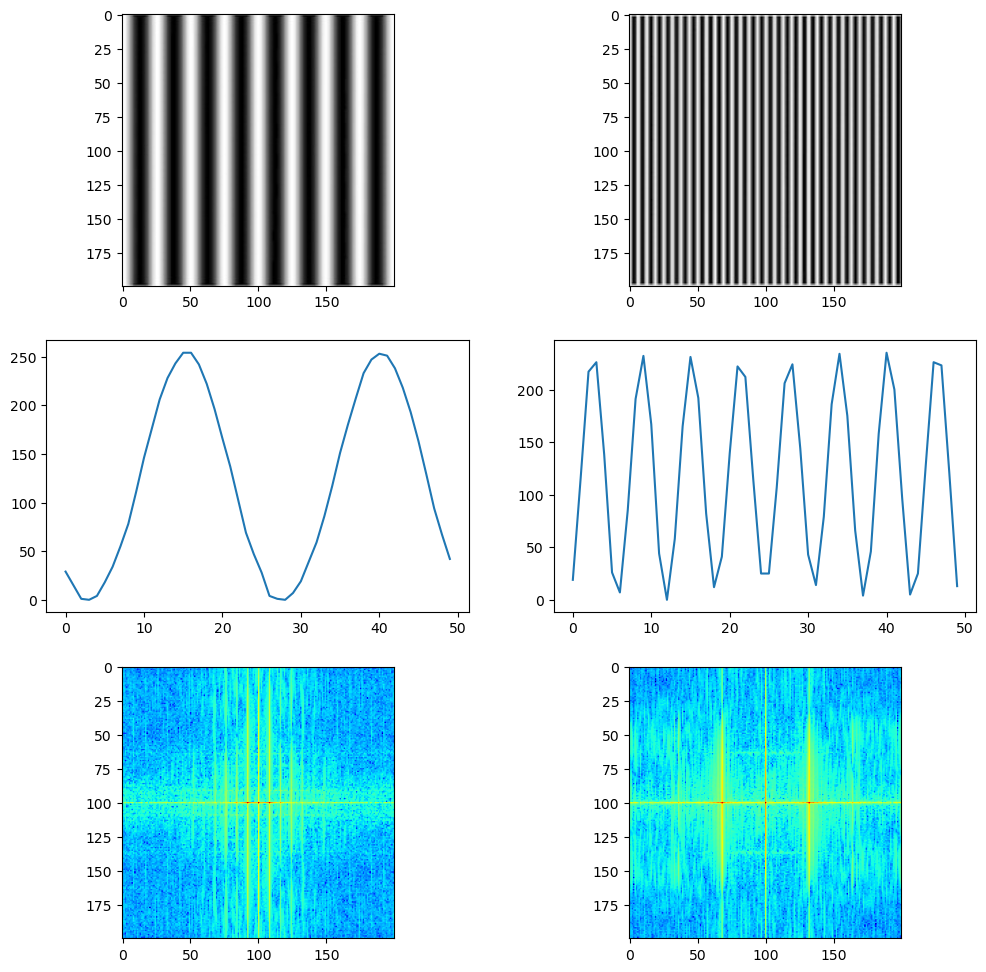

In [3]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.imshow(img_low_freq, cmap='gray')
plt.subplot(3,2,2)
plt.imshow(img_hig_freq, cmap='gray')

plt.subplot(3,2,3)
plt.plot(low_freq_sg)
plt.subplot(3,2,4)
plt.plot(hig_freq_sg)

plt.subplot(3,2,5)
plt.imshow(img_fft_low, cmap='jet')
plt.subplot(3,2,6)
plt.imshow(img_fft_hig, cmap='jet')

## Filtros en el dominio espectral

In [4]:
# funciones auxiliares
def fft2_mod(image):

  shifted_image_fft = np.fft.fftshift(np.fft.fft2(image))

  return 20*np.log(np.abs(shifted_image_fft))


def _filter_round_shape(height, width, radius):
  canvas = np.zeros((height, width))
  return cv.circle(canvas,
                     center=(int(canvas.shape[1]/2), int(canvas.shape[0]/2)),
                     radius=radius,
                     color=(255),
                     thickness=-1).astype(np.uint8)


def create_lp_filter(height, width, radius=20):

  lp_filter = _filter_round_shape(height, width, radius)
  return lp_filter


def create_hp_filter(height, width, radius=60):

  lp_filter = _filter_round_shape(height, width, radius)
  return cv.bitwise_not(lp_filter)

In [5]:
# leo la imagen en escala de grises
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
# obtengo el modulo de la transformada de fourier
mod = fft2_mod(img)

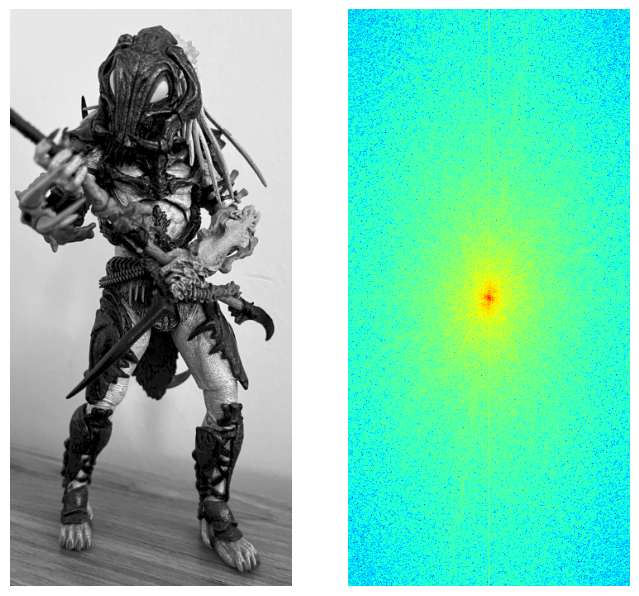

In [6]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(mod, cmap='jet')

### Definimos los filtros en el dominio espectral

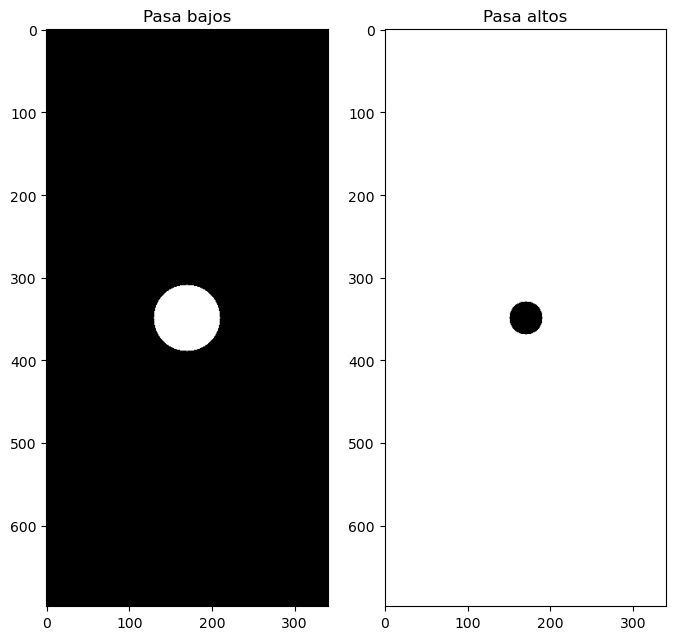

In [7]:
h, w = img.shape
lp_filter = create_lp_filter(h, w, radius=40)
hp_filter = create_hp_filter(h, w, radius=20)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(lp_filter, cmap='gray')
plt.title('Pasa bajos')
plt.subplot(1,2,2)
plt.title('Pasa altos')
plt.imshow(hp_filter, cmap='gray')

### Aplicamos los filtros a la imagen

In [8]:
# vuelvo a calcular la FFT. Para aplicar el filtro 
# necesito la transformada en modulo y fase en el dominio
# de los numeros complejos
shifted_fft = np.fft.fftshift(np.fft.fft2(img))
lp_filtered = shifted_fft * lp_filter
hp_filtered = shifted_fft * hp_filter

# Aplicamos la antitransformada y obtenemos las imagenes filtradas
f_ishift = np.fft.ifftshift(lp_filtered)
img_lp = np.real(np.fft.ifft2(f_ishift))
f_ishift = np.fft.ifftshift(hp_filtered)
img_hp = np.real(np.fft.ifft2(f_ishift))

### Graficamos los resultados

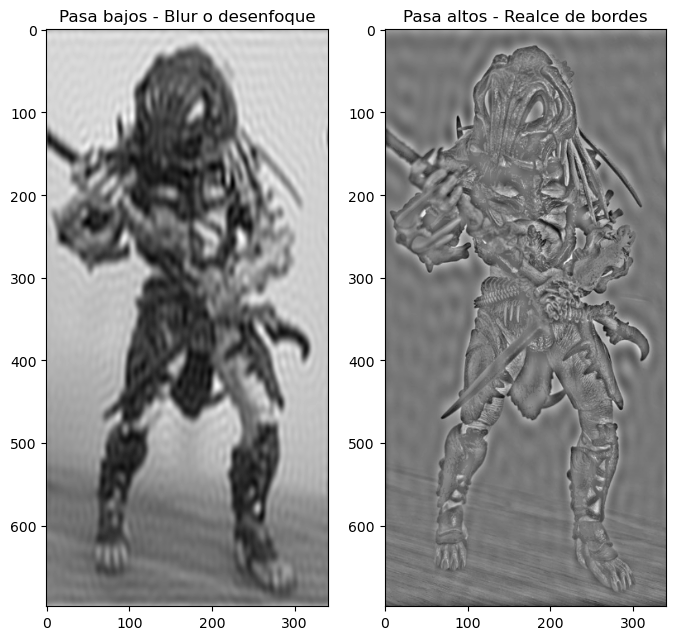

In [9]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img_lp, cmap='gray')
plt.title('Pasa bajos - Blur o desenfoque')
plt.subplot(1,2,2)
plt.title('Pasa altos - Realce de bordes')
plt.imshow(img_hp, cmap='gray')

In [11]:
def create_gauss_filter(h, w, k_size=5, sigma=5):

SyntaxError: incomplete input (1470785886.py, line 1)

In [12]:
kernel, kernel_tf = create_gauss_filter(h, w, k_size=15, sigma=2)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

NameError: name 'create_gauss_filter' is not defined

In [13]:
img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

NameError: name 'kernel_tf' is not defined